In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [51]:
df=pd.read_csv("sd.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [53]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [54]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_columns)


Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [55]:
df1 = df[numerical_columns]
var=df1.var()
df1

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [56]:
var

Volume               1.790646e+01
Avg Price            3.268830e+08
Total Sales Value    2.553794e+09
Discount Rate (%)    1.781348e+01
Discount Amount      2.033922e+07
Net Sales Value      2.149125e+09
dtype: float64

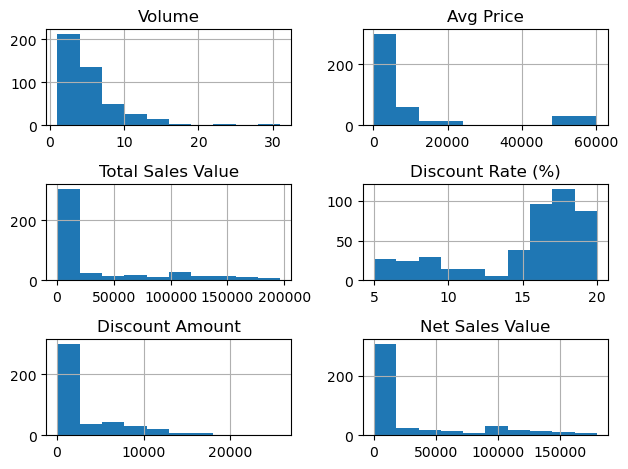

In [57]:
df.hist() ## Plots histograms for all numerical columns by default
plt.tight_layout() # creates spaces betweeen subplots
plt.show() #display the plot.


In [58]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Combine skewness and outlier detection using IQR
for col in numerical_columns:
  # Calculate skewness
  skewness = df1[col].skew()

  # IQR outlier detection
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

  print(f"\nColumn: {col}")
  print("  Skewness:", skewness)
  print("  Outliers:")
  if outliers.empty:
    print("No outliers detected.")
  else:
    print(outliers)



Column: Volume
  Skewness: 2.731723626557714
  Outliers:
           Date        Day  SKU City  Volume         BU   Brand  \
0    01-04-2021   Thursday  M01    C      15    Mobiles   RealU   
10   01-04-2021   Thursday  F01    C      13       FMCG  Babaji   
30   02-04-2021     Friday  M01    C      11    Mobiles   RealU   
40   02-04-2021     Friday  F01    C      29       FMCG  Babaji   
50   02-04-2021     Friday  L01    C      13  Lifestyle   Jeera   
70   03-04-2021   Saturday  F01    C      24       FMCG  Babaji   
71   03-04-2021   Saturday  F02    C      14       FMCG   Vedic   
80   03-04-2021   Saturday  L01    C      12  Lifestyle   Jeera   
100  04-04-2021     Sunday  F01    C      25       FMCG  Babaji   
101  04-04-2021     Sunday  F02    C      15       FMCG   Vedic   
102  04-04-2021     Sunday  F03    C      11       FMCG   Vedic   
130  05-04-2021     Monday  F01    C      15       FMCG  Babaji   
140  05-04-2021     Monday  L01    C      14  Lifestyle   Jeera   
161 

In [59]:
# Check for missing values (optional)
print(df.isnull().sum())  # Check for any missing values

# Descriptive statistics
print(df.describe()) #to get an overview of the data 

# Calculate skewness for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
#Iterate through numerical columns using a loop
for col in numerical_cols: 
  skewness = df1[col].skew()
  print(f"Skewness of {col}: {skewness:.2f}")

# Identify outliers using IQR (Interquartile Range):
def find_outliers_iqr(data, col):
  q1 = df1[col].quantile(0.25)
  q3 = df1[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
  return outliers

for col in numerical_cols:
  outliers = find_outliers_iqr(df.copy(), col)
  if len(outliers) > 0:
    print(f"Outliers in {col}:")
    print(outliers)
  else:
    print(f"No outliers detected in {col}")


Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sa

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  
0   

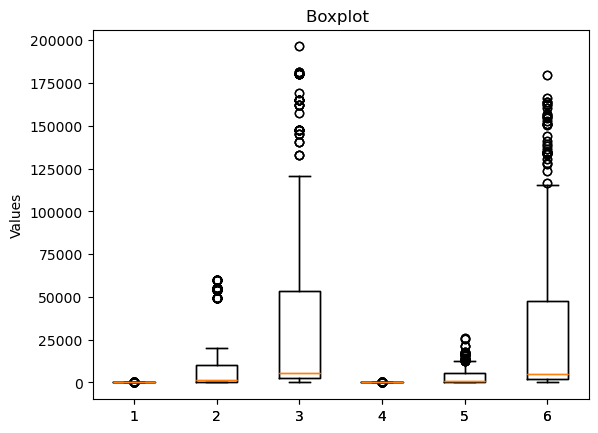

In [60]:
import matplotlib.pyplot as plt
import numpy as np
print(df1)
# Creating a boxplot
plt.boxplot(df1)
plt.boxplot(df1, vert = True)

# Adding title and labels
plt.title('Boxplot ')
plt.ylabel('Values')

# Displaying the plot
plt.show()


In [61]:
df.replace('?',np.nan)
df.head
df
#df.dtypes #13rows where 7obj dtypes,2 int dtypes,3 float dtypes
#hence we have to work with obj dtypes



,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [62]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [63]:
df['Brand'].unique()

array(['RealU', 'YouM', 'Sumsang', 'Orange', 'Babaji', 'Vedic', 'Gear',
       'Jeera', 'Viva'], dtype=object)

In [64]:
df['Brand'].unique()
df['Day'].unique()


array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [65]:
df['Model'].unique()


array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)

In [66]:
df['Avg Price'].unique()

array([12100, 10100, 16100, 20100,  8100, 49100, 54100, 55100, 60100,
         400,   300,   390,   465,   290,   450,   500,   560,  1099,
         900,  1300,  2099,  2600,  1600,  1900,  3100], dtype=int64)

In [67]:
df['Total Sales Value'].unique()

array([181500, 101000, 112700, 120600,  24300, 147300, 108200, 110200,
       180300,   5200,   1200,   1560,   4185,   1450,   2250,   1500,
          560,   4396,   4500,   4000,   6300,   6500,  10495,  13000,
         4800,   1900,   9300, 133100,  80800,  16200,  54100, 165300,
        11600,   2400,   2340,   2030,   1350,    400,   1120,   3297,
         5850,   3600,   7800,  14693,  10400,   6200,  60500,  50500,
        80500, 100500,  32400, 196400,  55100, 120200,   9600,   4200,
         2790,   1740,   2700,   2500,   5400,   6297,   3900,  15600,
         5700,   3100, 108900,  90900,  48300,  10000,   4290,   3255,
         1800,   2000,   1600,   1680,   1099,   5000,   3200,  36300,
        60600,  60300, 162300,   6000,   2100,   3720,   1160,    800,
         2198,   8396,  84700,  64400,  40500,  98200,   3120,    930,
          870,   1000,   3000, 145200,  20200,  80400,   8800,   5115,
          580,   2240,   3800, 169400,  70700,  48600,  60100,   3300,
      

<Axes: >

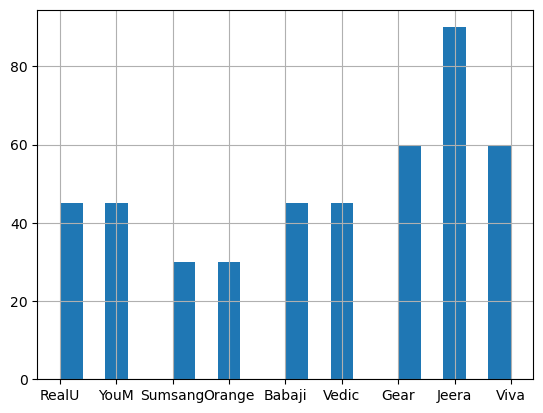

In [68]:
df['Brand'].hist(bins=20)

In [69]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

# Print the names of categorical columns
print("Categorical columns:")
for col in categorical_columns:
    print(col)


Categorical columns:
Date
Day
SKU
City
BU
Brand
Model


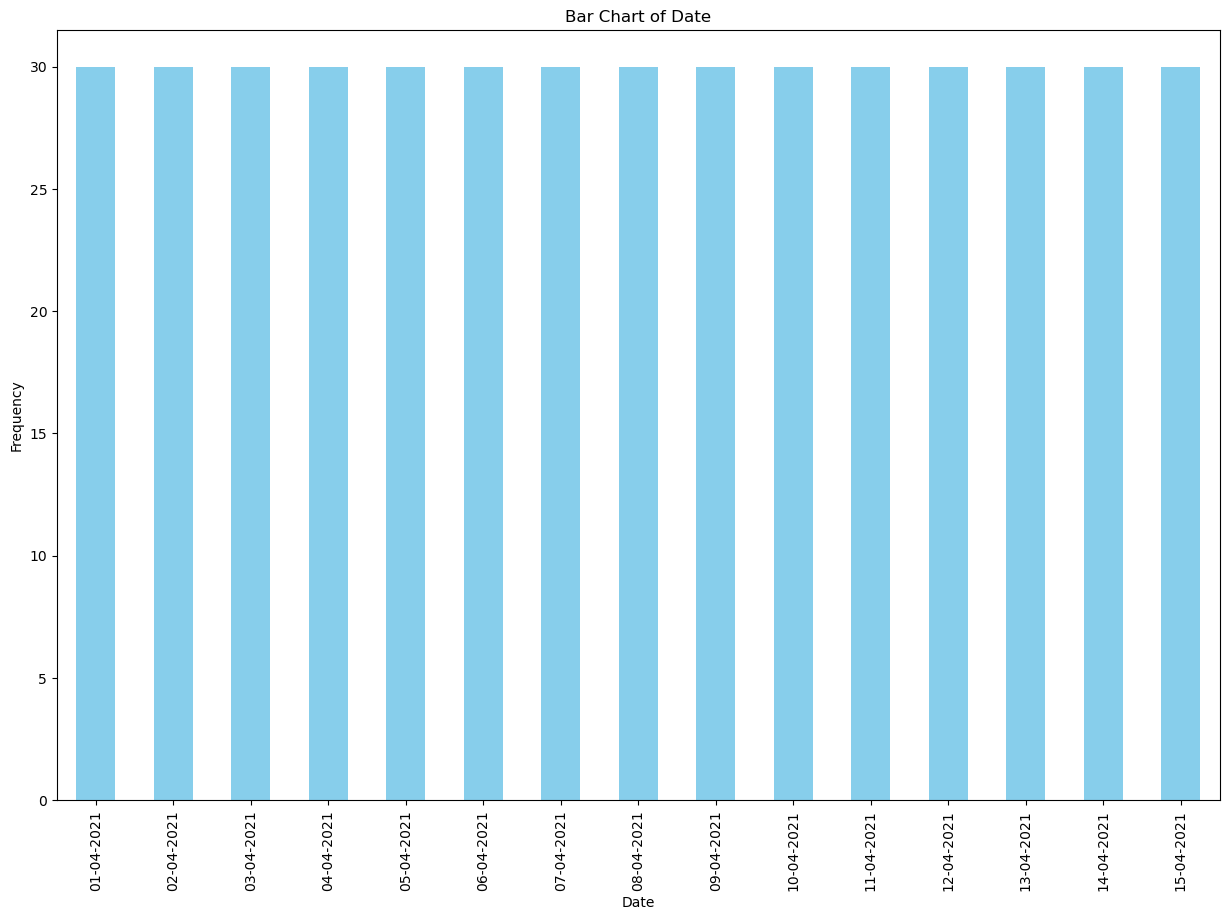

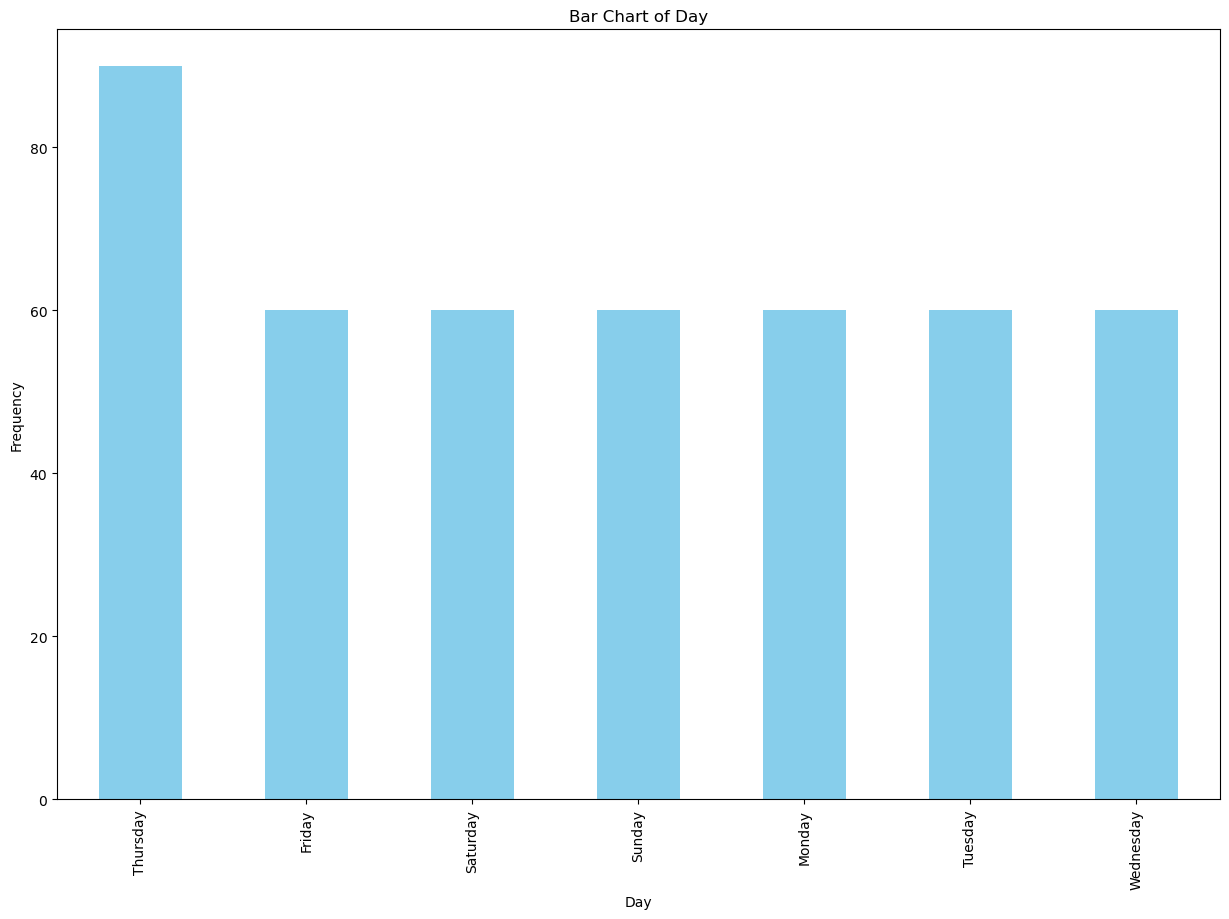

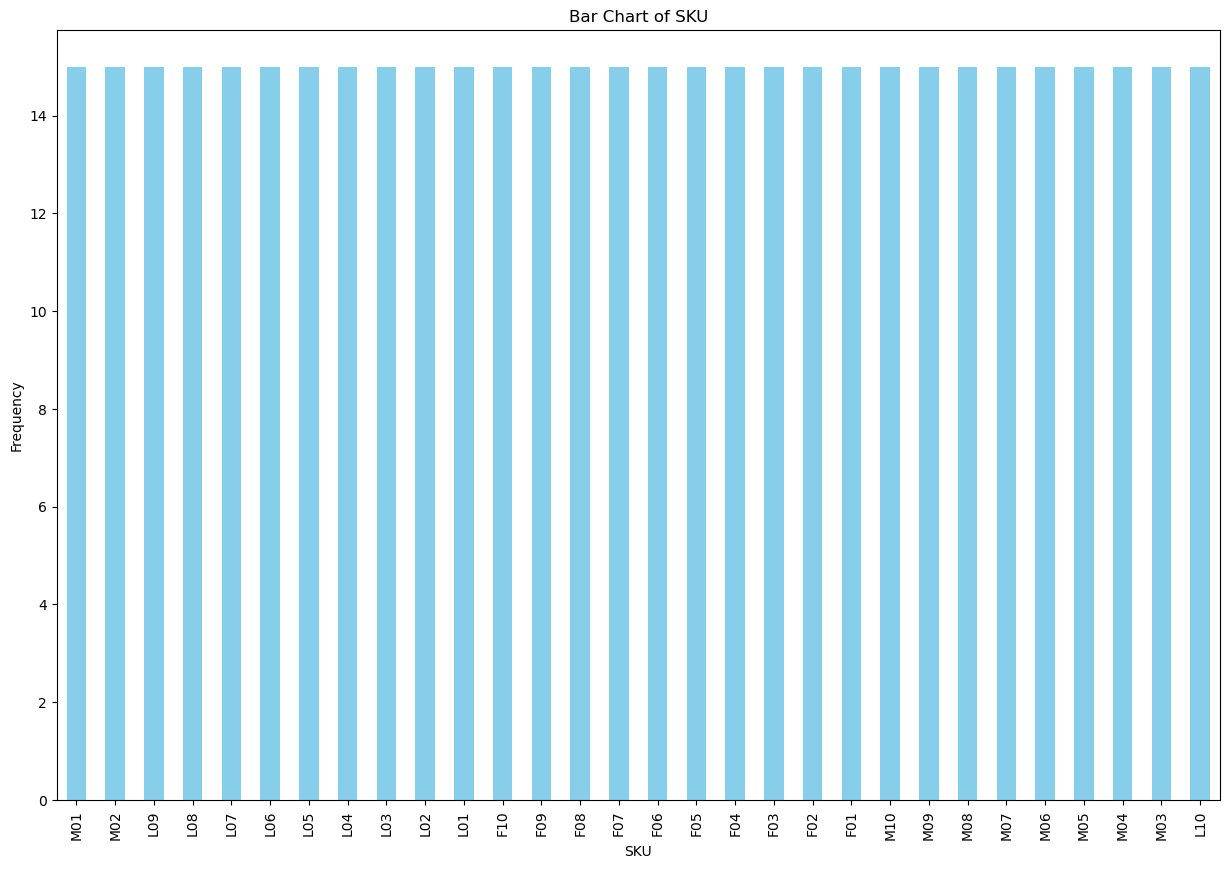

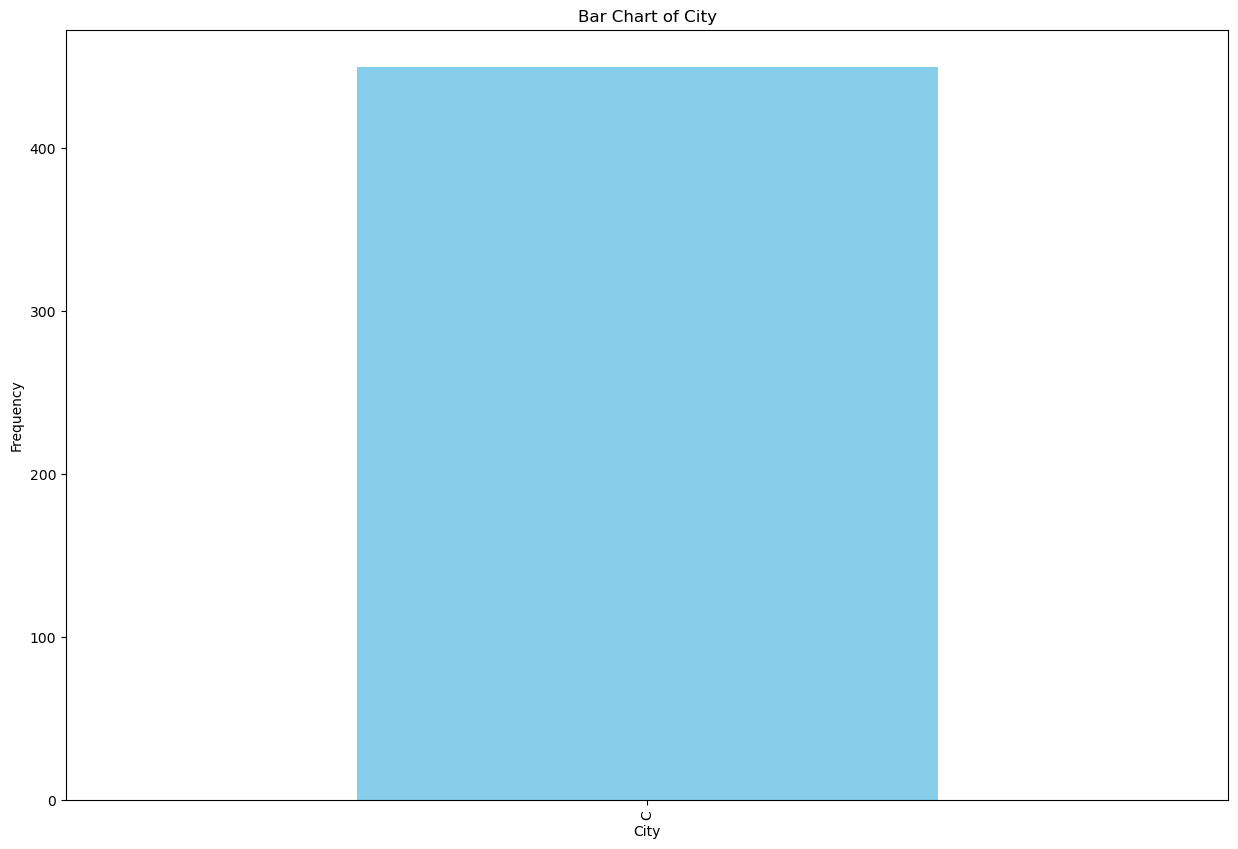

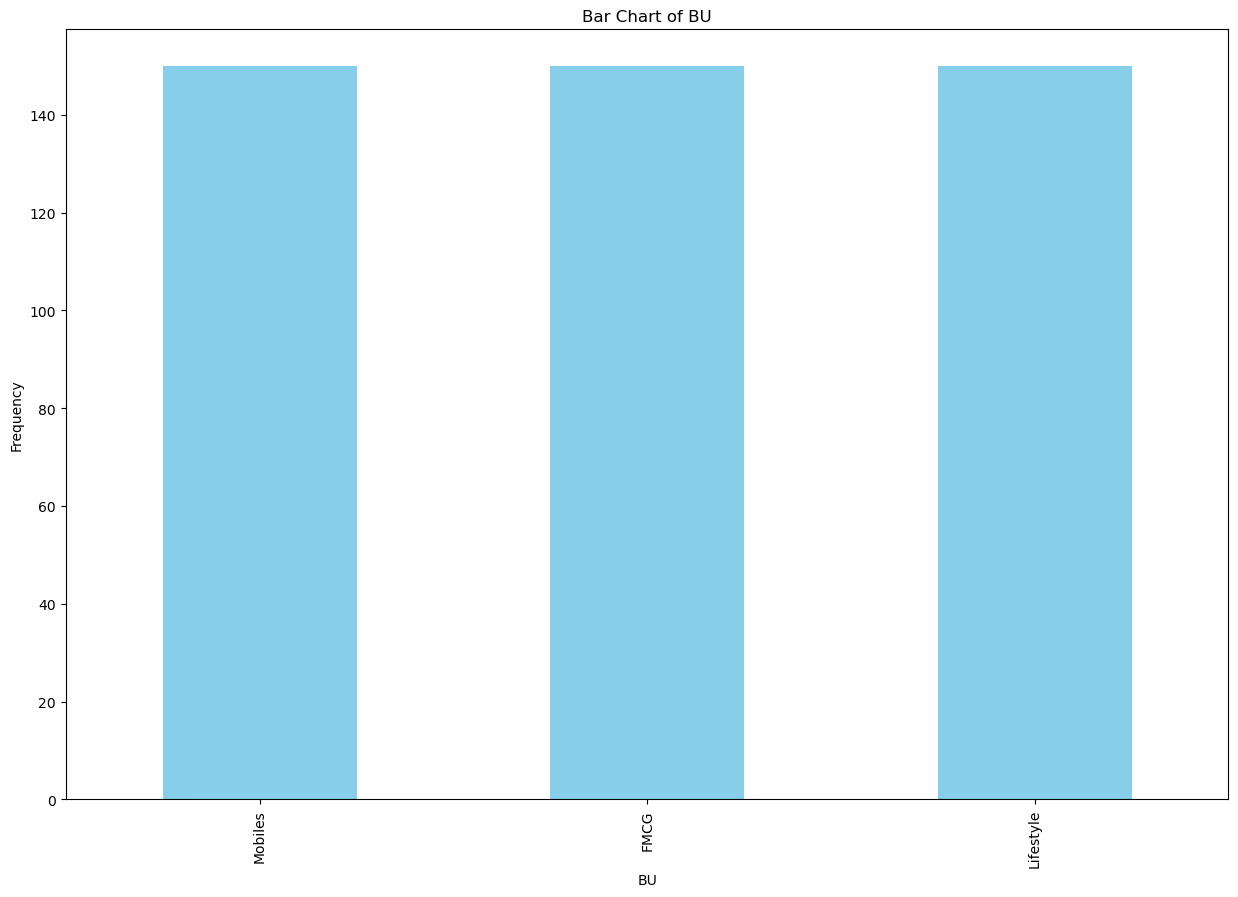

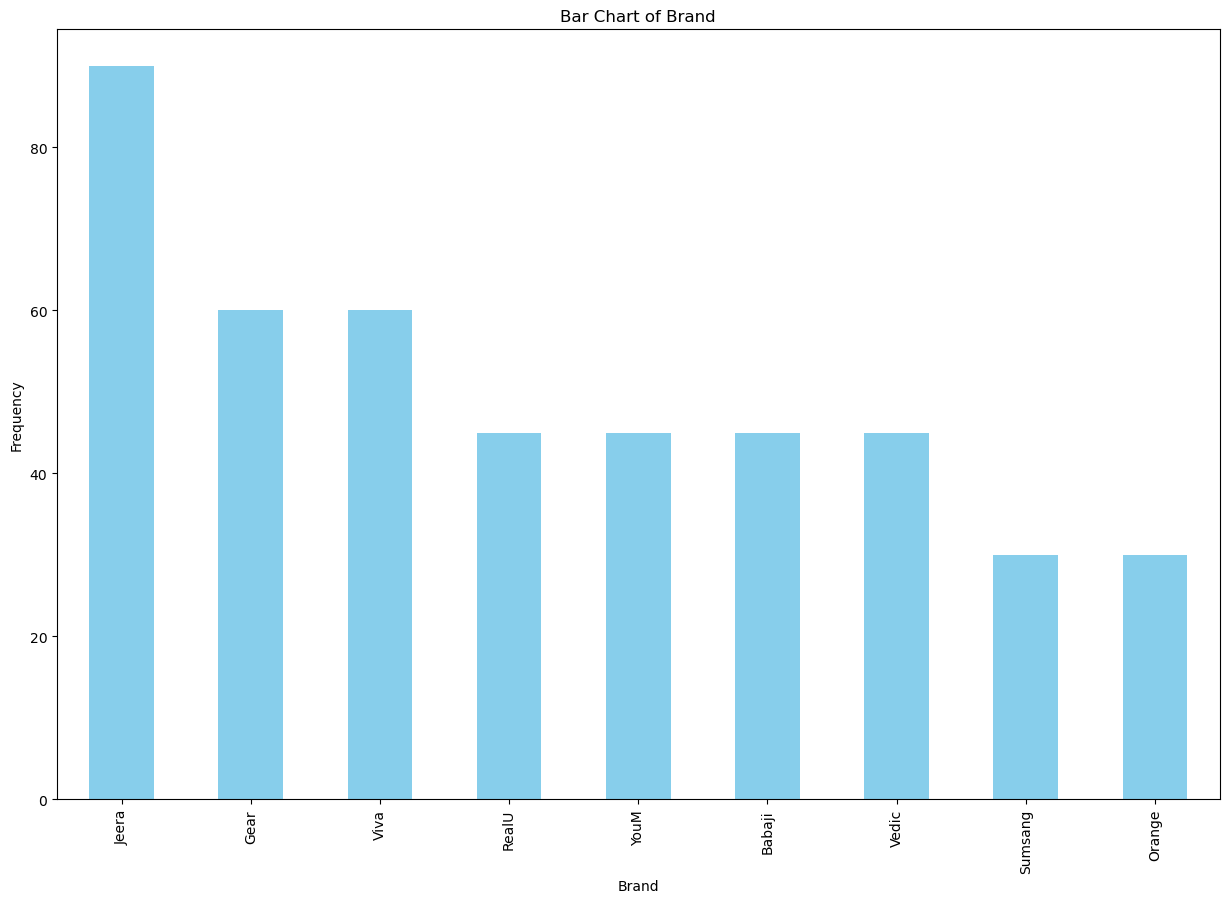

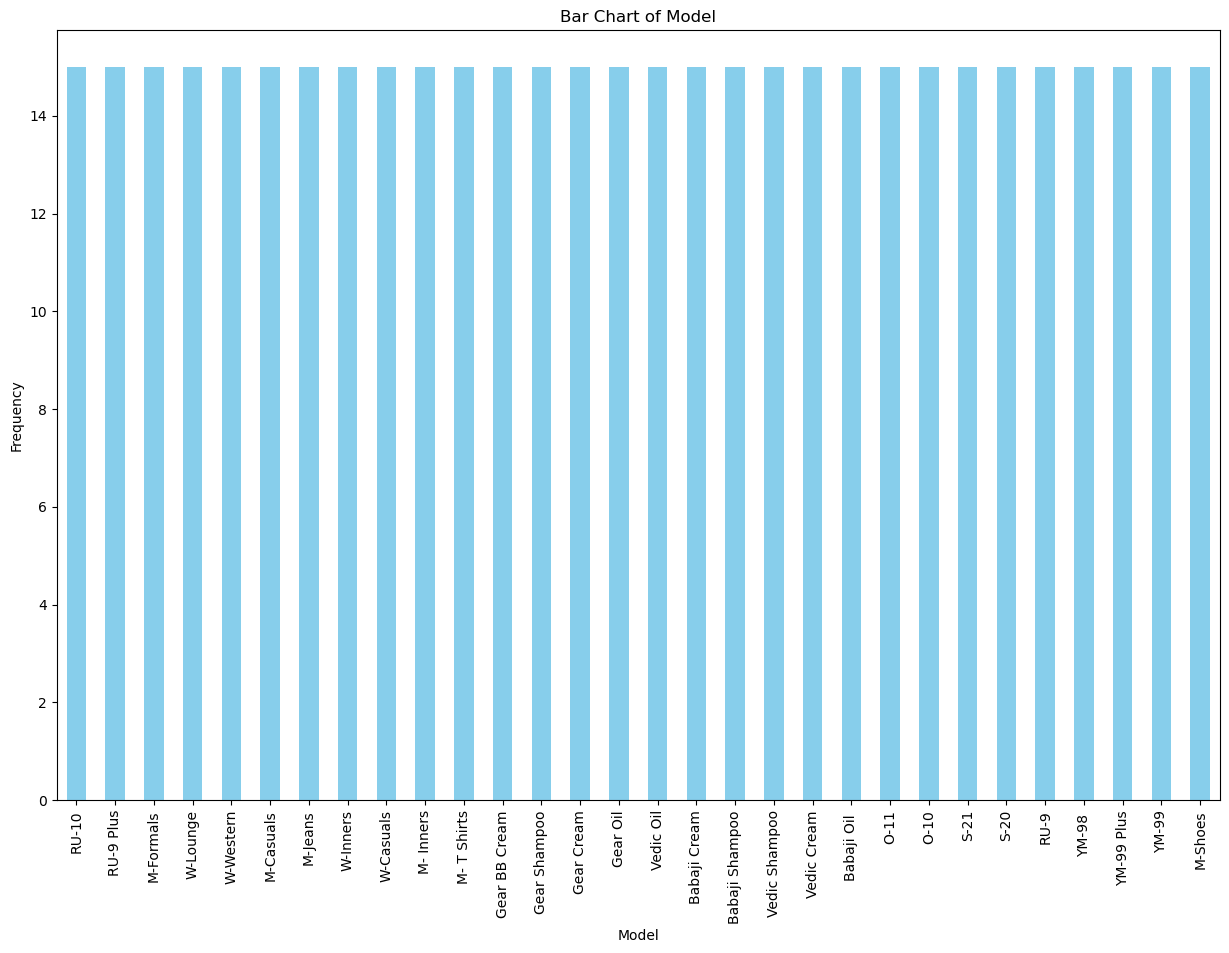

In [70]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(15,10))  # Set the figure size
    df[col].value_counts().plot(kind='bar', color='skyblue')  # Plot the bar chart
    plt.title(f'Bar Chart of {col}')  # Set the title of the chart
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    #plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()  # Show the plot



In [71]:
df #before standardization

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [72]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Standardize numerical columns
for col in numerical_columns:
    mean = df[col].mean()  # Calculate the mean
    std = df[col].std()    # Calculate the standard deviation
    df[col] = (df[col] - mean) / std  # Apply standardization formula

# Now 'df' contains standardized numerical columns
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.724706,Lifestyle,Jeera,M-Casuals,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,15-04-2021,Thursday,L07,C,0.220563,Lifestyle,Viva,W-Western,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,15-04-2021,Thursday,L08,C,-0.724706,Lifestyle,Viva,W-Lounge,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,15-04-2021,Thursday,L09,C,-0.488389,Lifestyle,Jeera,M-Formals,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


In [73]:
import pandas as pd

# Assuming 'df' is your DataFrame containing categorical columns
# Replace 'df' with the name of your DataFrame

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print unique values of each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'Date': ['01-04-2021' '02-04-2021' '03-04-2021' '04-04-2021' '05-04-2021'
 '06-04-2021' '07-04-2021' '08-04-2021' '09-04-2021' '10-04-2021'
 '11-04-2021' '12-04-2021' '13-04-2021' '14-04-2021' '15-04-2021']
Unique values in 'Day': ['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Unique values in 'SKU': ['M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'M08' 'M09' 'M10' 'F01' 'F02'
 'F03' 'F04' 'F05' 'F06' 'F07' 'F08' 'F09' 'F10' 'L01' 'L02' 'L03' 'L04'
 'L05' 'L06' 'L07' 'L08' 'L09' 'L10']
Unique values in 'City': ['C']
Unique values in 'BU': ['Mobiles' 'FMCG' 'Lifestyle']
Unique values in 'Brand': ['RealU' 'YouM' 'Sumsang' 'Orange' 'Babaji' 'Vedic' 'Gear' 'Jeera' 'Viva']
Unique values in 'Model': ['RU-10' 'RU-9 Plus' 'YM-99' 'YM-99 Plus' 'YM-98 ' 'RU-9' 'S-20' 'S-21'
 'O-10' 'O-11' 'Babaji Oil ' 'Vedic Cream' 'Vedic Shampoo'
 'Babaji Shampoo' 'Babaji Cream' 'Vedic Oil' 'Gear Oil' 'Gear Cream'
 'Gear Shampoo' 'Gear BB Cream' 'M- T Shirts' 'M- Inners' '

In [77]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
dfe= pd.get_dummies(df, columns=categorical_columns)

# Display a portion of the transformed dataset
print(dfe)  # Display the first few rows of the transformed DataFrame


       Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0    2.347417   0.091072           2.922469          -0.829365   
1    1.165831  -0.019548           1.329516          -0.851714   
2    0.456880   0.312312           1.561038          -1.350129   
3    0.220563   0.533552           1.717365          -1.947555   
4   -0.488389  -0.130168          -0.188242           0.672990   
..        ...        ...                ...                ...   
445 -0.724706  -0.506277          -0.617647           0.075924   
446  0.220563  -0.434374          -0.360400           0.450596   
447 -0.724706  -0.489684          -0.605774           0.902788   
448 -0.488389  -0.473091          -0.556303           0.388042   
449 -0.961023  -0.406719          -0.607753           0.042188   

     Discount Amount  Net Sales Value  Date_01-04-2021  Date_02-04-2021  \
0           3.948422         2.801638             True            False   
1           1.846958         1.269613             True   

In [ ]:
# Standardization:
# Standardization ensures that all features are on the same scale by transforming them to have a mean of 0 and a standard deviation of 1. 
# Many machine learning algorithms perform better when features are standardized. Standardization helps algorithms converge faster and prevents features with larger scales from dominating those with smaller scales.
# Standardized features are easier to interpret because they represent deviations from the mean in terms of standard deviations. 
# One-Hot Encoding:
# One-hot encoding converts categorical variables into binary (0 or 1) representations, preserving the information contained in the categories. 
# One-hot encoding prevents algorithms from assuming any ordinal relationships between categories. Each category is represented by its own binary feature.
#  Many machine learning algorithms cannot directly handle categorical data. By converting categorical variables into one-hot encoded features, algorithms can process the data more effectively and make better predictions.
